###SVM


In [1]:
import pandas as pd
# import pandas_profiling as pf

In [2]:
import pandas as pd

df_data = pd.read_csv ("case_8.csv")

In [3]:
df_data.describe()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
count,114321.000000,114321.000000,1.143210e+05,1.143210e+05,1.143210e+05,1.143210e+05,1.143210e+05,1.143210e+05,1.143210e+05,1.143210e+05,...,1.143210e+05,1.143210e+05,114321.000000,1.143210e+05,1.143210e+05,1.143210e+05,1.143210e+05,114321.000000,1.143210e+05,1.143210e+05
mean,114228.928228,0.761199,1.630686e+00,7.464411e+00,4.145098e+00,8.742359e+00,2.436402e+00,2.483921e+00,1.496569e+00,9.031859e+00,...,2.737596e+00,6.822439e+00,3.549938,9.198120e-01,1.672658e+00,3.239542e+00,2.030373e+00,0.310144,1.925763e+00,1.739389e+00
std,65934.487362,0.426353,8.132649e-01,2.225036e+00,8.626621e-01,1.543441e+00,4.506138e-01,4.427150e-01,2.109786e+00,1.449542e+00,...,1.018603e+00,1.348700e+00,1.943431,1.591555e+00,3.779128e-01,1.221225e+00,8.143413e-01,0.693262,9.496402e-01,8.518204e-01
min,3.000000,0.000000,-9.996497e-07,-9.817614e-07,-6.475929e-07,-5.287068e-07,-9.055091e-07,-9.468765e-07,-7.783778e-07,-9.828757e-07,...,-9.820642e-07,-9.978497e-07,0.019139,-9.994953e-07,-9.564174e-07,-9.223798e-07,8.197812e-07,0.000000,-9.901257e-07,-9.999134e-07
25%,57280.000000,1.000000,1.346153e+00,6.575770e+00,4.068697e+00,8.394090e+00,2.340968e+00,2.376586e+00,2.653147e-01,8.813560e+00,...,2.282609e+00,6.519607e+00,2.571053,8.471320e-02,1.570974e+00,2.762497e+00,1.681261e+00,0.000000,1.449477e+00,1.463414e+00
50%,114189.000000,1.000000,1.630686e+00,7.464411e+00,4.145098e+00,8.742359e+00,2.436402e+00,2.483921e+00,1.496569e+00,9.031859e+00,...,2.737596e+00,6.822439e+00,3.549938,9.198120e-01,1.672658e+00,3.239542e+00,2.030373e+00,0.000000,1.925763e+00,1.739389e+00
75%,171206.000000,1.000000,1.630686e+00,7.551501e+00,4.340229e+00,8.924798e+00,2.484699e+00,2.528445e+00,1.496569e+00,9.302325e+00,...,2.737596e+00,6.999999e+00,3.549938,9.198120e-01,1.672658e+00,3.239542e+00,2.030373e+00,0.000000,1.925763e+00,1.739389e+00
max,228713.000000,1.000000,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,...,2.000000e+01,2.000000e+01,19.686069,2.000000e+01,1.563161e+01,2.000000e+01,2.000000e+01,11.000000,2.000000e+01,2.000000e+01


In [4]:
df_data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,1.630686,7.464411,C,4.145098,9.191265,2.436402,2.483921,2.301630,...,6.822439,3.549938,0.598896,AF,1.672658,3.239542,1.957825,0,1.925763,1.739389
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,1.630686,7.464411,C,4.145098,8.742359,2.436402,2.483921,1.496569,...,6.822439,3.549938,0.919812,Z,1.672658,3.239542,2.030373,0,1.925763,1.739389


In [5]:
df_data.tail()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
114316,228708,1,1.630686,7.464411,C,4.145098,8.742359,2.436402,2.483921,1.496569,...,6.822439,3.549938,0.919812,AL,1.672658,3.239542,2.030373,0,1.925763,1.739389
114317,228710,1,1.630686,7.464411,C,4.145098,8.742359,2.436402,2.483921,1.496569,...,6.822439,3.549938,0.919812,E,1.672658,3.239542,2.030373,1,1.925763,1.739389
114318,228711,1,1.630686,7.464411,C,4.145098,10.069277,2.436402,2.483921,0.323324,...,6.822439,3.549938,0.156764,Q,1.672658,3.239542,2.417606,2,1.925763,1.739389
114319,228712,1,1.630686,7.464411,C,4.145098,10.106144,2.436402,2.483921,0.309226,...,6.822439,3.549938,0.490658,BW,1.672658,3.239542,3.526650,0,1.925763,1.739389
114320,228713,1,1.619763,7.932978,C,4.640085,8.473141,2.351470,2.826766,3.479754,...,7.936508,2.944285,3.135205,V,1.943149,4.385553,1.604493,0,1.787610,1.386138


In [6]:
# from pandas_profiling import ProfileReport
# ProfileReport(df_data,minimal=True)

In [7]:
corr = df_data.corr()

<Figure size 1800x1800 with 0 Axes>

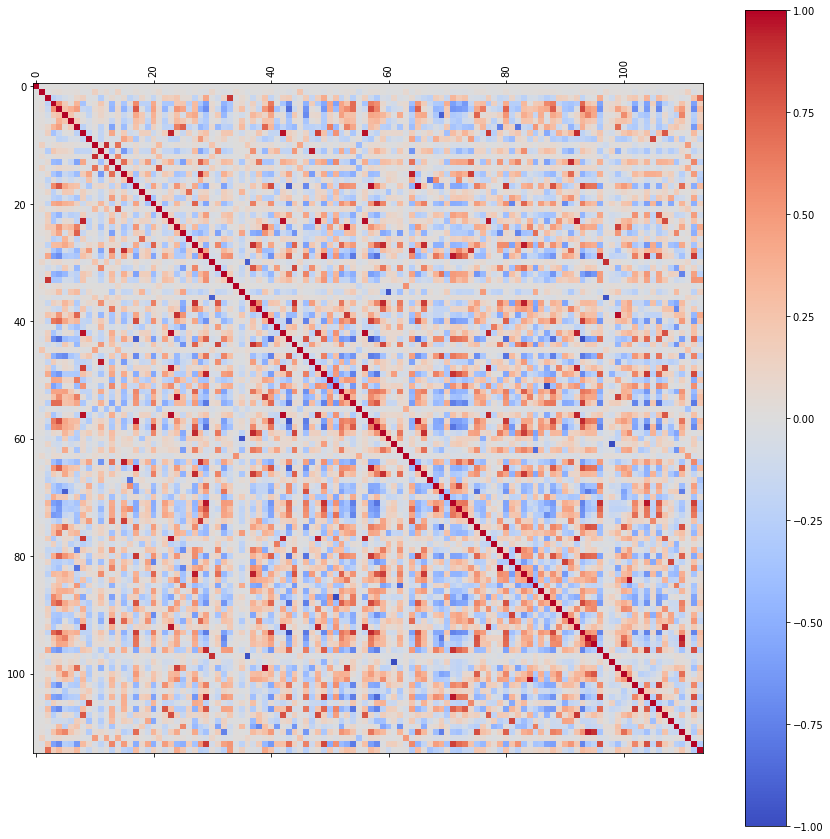

In [8]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(25,25))
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
plt.xticks(rotation=90)
fig.set_size_inches(15, 15)
plt.show()

In [9]:
### Does not give us a very presentable output, but we can see that there are some columns with very high correlation 

In [10]:
import numpy as np
high_corr_var=np.where(corr > 0.95)
high_corr_var=[(corr.columns[x],corr.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [11]:
high_corr_var

[('v8', 'v46'),
 ('v8', 'v63'),
 ('v11', 'v53'),
 ('v17', 'v64'),
 ('v17', 'v76'),
 ('v25', 'v46'),
 ('v25', 'v54'),
 ('v25', 'v63'),
 ('v25', 'v89'),
 ('v25', 'v105'),
 ('v26', 'v60'),
 ('v29', 'v96'),
 ('v33', 'v83'),
 ('v41', 'v96'),
 ('v43', 'v116'),
 ('v46', 'v63'),
 ('v54', 'v89'),
 ('v64', 'v76'),
 ('v83', 'v121'),
 ('v92', 'v95'),
 ('v97', 'v118'),
 ('v108', 'v128')]

In [12]:
neg_corr_var = np.where(corr < -0.90)
neg_corr_var = [(corr.columns[x],corr.columns[y]) for x,y in zip(*neg_corr_var) if x!=y and x<y]

In [13]:
neg_corr_var

[('v5', 'v81'),
 ('v17', 'v48'),
 ('v34', 'v40'),
 ('v39', 'v68'),
 ('v40', 'v114'),
 ('v48', 'v64'),
 ('v48', 'v106'),
 ('v58', 'v100'),
 ('v69', 'v115')]

In [14]:
df_data.v22.head()

0     XDX
1     GUV
2      FQ
3    ACUE
4     HIT
Name: v22, dtype: object

In [15]:
df_data.drop('v22',axis=1,inplace=True)

In [16]:
#### For now just dropping the columns that have a very high positive and negative corelation. 

In [17]:
cols = df_data.dtypes
display(df_data.loc[:,cols == "object"])
columns = df_data.loc[:,cols == "object"].columns

,v3,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
0,C,C,C,A,C,G,DI,C,F,B,D,E,A,E,B,O,G,AU
1,C,C,C,A,E,G,DY,A,F,B,D,D,B,B,A,U,G,AF
2,C,E,C,A,C,F,AS,A,B,B,B,E,G,C,B,S,G,AE
3,C,D,C,B,C,H,BW,A,F,B,D,B,B,B,B,J,G,CJ
4,C,E,C,A,I,H,BW,C,F,B,D,C,G,C,A,T,G,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114316,C,E,C,A,I,E,N,A,B,B,B,C,A,E,A,U,G,AL
114317,C,D,C,B,C,I,BW,A,F,B,D,B,G,C,B,J,G,E
114318,C,A,C,B,C,D,BW,A,B,B,B,B,G,C,B,R,G,Q
114319,C,D,G,A,C,J,AS,A,F,B,D,E,A,E,B,A,G,BW


In [18]:
from tqdm import tqdm

data = [ pd.get_dummies(df_data[col], prefix=col).copy() for col in tqdm(columns) ]
one_hot_df = pd.concat(data, axis=1)

display(one_hot_df.head())

100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 105.35it/s]


,v3_A,v3_B,v3_C,v24_A,v24_B,v24_C,v24_D,v24_E,v30_A,v30_B,...,v125_Q,v125_R,v125_S,v125_T,v125_U,v125_V,v125_W,v125_X,v125_Y,v125_Z
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [19]:
#Drop old columns
df_data_nc = df_data.drop(columns, axis=1)

df_data_final = pd.concat([df_data_nc, one_hot_df], axis=1)

print(df_data_final.shape)
display(df_data_final.head())

(114321, 478)


,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v125_Q,v125_R,v125_S,v125_T,v125_U,v125_V,v125_W,v125_X,v125_Y,v125_Z
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,0,0,0,0,0,0,0,0,0,0
1,4,1,1.630686,7.464411,4.145098,9.191265,2.436402,2.483921,2.301630,9.031859,...,0,0,0,0,0,0,0,0,0,0
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,0,0,0,0,0,0,0,0,0,0
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,0,0,0,0,0,0,0,0,0,0
4,8,1,1.630686,7.464411,4.145098,8.742359,2.436402,2.483921,1.496569,9.031859,...,0,0,0,0,0,0,0,0,0,1


In [20]:
import numpy as np
def reduce_features(df, verbose = False):
    # calculate the correlation matrix
    corr_matrix  = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    
    #Get all of the correlation values > 95%
    x = np.where(upper > 0.95)

    #Display all field combinations with > 95% correlation
    cf = pd.DataFrame()
    cf['Field1'] = upper.columns[x[1]]
    cf['Field2'] = upper.index[x[0]]

    #Get the correlation values for every field combination. (There must be a more pythonic way to do this!)
    corr = [0] * len(cf)
    for i in range(0, len(cf)):
        corr[i] =  upper[cf['Field1'][i]][cf['Field2'][i]] 

    cf['Correlation'] = corr

    if( verbose ):
        print('There are ', str(len(cf['Field1'])), ' field correlations > 95%.')
        display(cf)
        
        print('Dropping the following ', str(len(to_drop)), ' highly correlated fields.')
        to_drop
        
    #Check columns before drop 
    if( verbose ):
        print('\r\n*********Before: Dropping Highly Correlated Fields*************************************')
        display(df.info(verbose=False))

    # Drop the highly correlated features from our training data 
    df = df.drop(to_drop, axis=1)

    #Check columns after drop 
    if( verbose ):
        print('\r\n*********After: Dropping Highly Correlated Fields**************************************')
        df.info(verbose=False)
    
    return df

In [21]:
df_data_encoded = reduce_features(df_data_final, True)

There are  46  field correlations > 95%.


,Field1,Field2,Correlation
0,v46,v8,0.975192
1,v63,v8,0.975974
2,v53,v11,0.955757
3,v64,v17,0.982626
4,v76,v17,0.992671
5,v46,v25,0.982215
6,v54,v25,0.967925
7,v63,v25,0.981040
8,v89,v25,0.964606
9,v105,v25,0.962163


Dropping the following  38  highly correlated fields.

*********Before: Dropping Highly Correlated Fields*************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 478 entries, ID to v125_Z
dtypes: float64(108), int64(6), uint8(364)
memory usage: 139.1 MB


None


*********After: Dropping Highly Correlated Fields**************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 440 entries, ID to v125_Z
dtypes: float64(88), int64(6), uint8(346)
memory usage: 119.7 MB


In [22]:
df_data_encoded.head()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v125_Q,v125_R,v125_S,v125_T,v125_U,v125_V,v125_W,v125_X,v125_Y,v125_Z
0,3,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,0,0,0,0,0,0,0,0,0,0
1,4,1,1.630686,7.464411,4.145098,9.191265,2.436402,2.483921,2.301630,9.031859,...,0,0,0,0,0,0,0,0,0,0
2,5,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,0,0,0,0,0,0,0,0,0,0
3,6,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,0,0,0,0,0,0,0,0,0,0
4,8,1,1.630686,7.464411,4.145098,8.742359,2.436402,2.483921,1.496569,9.031859,...,0,0,0,0,0,0,0,0,0,1


In [23]:
labels = df_data_encoded.target

In [24]:
df_data_encoded_X = df_data_encoded.drop(["ID","target"],axis = 1)

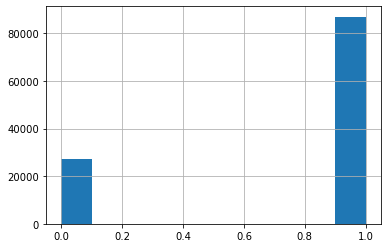

In [25]:
labels.hist()

In [26]:
# the dataset is not balanced, therefore we will have to use stratification

In [27]:
### Scale the Dataset 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_enc_scaled = scaler.fit_transform(df_data_encoded_X)

In [28]:

#### Stratified Test, Train Validation Split 

### First Lets do 70 and 30. 
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_enc_scaled, labels,
                                                    stratify=labels, 
                                                    test_size=0.30,
                                                    random_state=123)






In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import sklearn.feature_selection as fs
from sklearn.model_selection import cross_val_score
import timeit
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import maatplotlib.pyplot as plt

In [33]:
from sklearn.preprocessing import StandardScaler


# Gridsearch to determine the value of C
param_grid = {'C': [0.001,0.01,0.1],
              'loss': ['hinge', 'squared_hinge'],
              'penalty' : ['l2'],
              'dual' : [True,False],
              'tol': [0.00001,0.0001,0.001,0.01,0.1,1], #0.0001 is the Default
              'max_iter': [1500,2000,3000,4000,5000,6000],
              
             }

# Get the processing time to compare it with running the Grid Search in Parallel Mode
start_time = timeit.default_timer()

SVC_Linear = LinearSVC(random_state=42)
CV_rfc = GridSearchCV(estimator = SVC_Linear, param_grid=param_grid, cv= 3,n_jobs = -1,verbose=1)
CV_rfc_mod = CV_rfc.fit(X_train, y_train)

#Elapsed time required for grid search
elapsed_rf_nonparallel = timeit.default_timer() - start_time

RF_score = CV_rfc.score(X_test,y_test)
RF_ypred = CV_rfc.predict(X_test)
RFCV_matrix = metrics.confusion_matrix(y_test, RF_ypred)

print('Random Forest GridSearch Accuracy: ', RF_score)
print('Random Forest Matrix: ', RFCV_matrix)
print('Best Parameter: ', CV_rfc.best_params_)
print('\nClassification report')
print(classification_report(y_test,RF_ypred))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 47.7min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 165.1min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 412.3min
[Parallel(n_jobs=-1)]: Done 1296 out of 1296 | elapsed: 507.8min finished


Random Forest GridSearch Accuracy:  0.7690176983409628
Random Forest Matrix:  [[  806  7384]
 [  538 25569]]
Best Parameter:  {'C': 0.01, 'dual': False, 'loss': 'squared_hinge', 'max_iter': 1500, 'penalty': 'l2', 'tol': 0.01}

Classification report
              precision    recall  f1-score   support

           0       0.60      0.10      0.17      8190
           1       0.78      0.98      0.87     26107

    accuracy                           0.77     34297
   macro avg       0.69      0.54      0.52     34297
weighted avg       0.73      0.77      0.70     34297



In [34]:
df_gridsearch2 = pd.DataFrame(CV_rfc.cv_results_)

In [36]:
df_gridsearch2.sort_values(['mean_test_score'],ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_dual,param_loss,param_max_iter,param_penalty,param_tol,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
279,55.967064,7.403448,0.072473,0.004099,0.01,False,squared_hinge,5000,l2,0.01,"{'C': 0.01, 'dual': False, 'loss': 'squared_hi...",0.771584,0.770159,0.772812,0.771519,0.001084,1
285,55.294699,6.671690,0.066373,0.003010,0.01,False,squared_hinge,6000,l2,0.01,"{'C': 0.01, 'dual': False, 'loss': 'squared_hi...",0.771584,0.770159,0.772812,0.771519,0.001084,1
261,55.340740,7.055115,0.072793,0.007293,0.01,False,squared_hinge,2000,l2,0.01,"{'C': 0.01, 'dual': False, 'loss': 'squared_hi...",0.771584,0.770159,0.772812,0.771519,0.001084,1
255,55.301194,6.587623,0.072805,0.005086,0.01,False,squared_hinge,1500,l2,0.01,"{'C': 0.01, 'dual': False, 'loss': 'squared_hi...",0.771584,0.770159,0.772812,0.771519,0.001084,1
273,55.119091,6.889408,0.067369,0.003821,0.01,False,squared_hinge,4000,l2,0.01,"{'C': 0.01, 'dual': False, 'loss': 'squared_hi...",0.771584,0.770159,0.772812,0.771519,0.001084,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,0.460551,0.051601,0.000000,0.000000,0.1,False,hinge,6000,l2,0.0001,"{'C': 0.1, 'dual': False, 'loss': 'hinge', 'ma...",NaN,NaN,NaN,NaN,NaN,326
392,0.434641,0.007609,0.000000,0.000000,0.1,False,hinge,6000,l2,0.001,"{'C': 0.1, 'dual': False, 'loss': 'hinge', 'ma...",NaN,NaN,NaN,NaN,NaN,327
393,0.428526,0.007231,0.000000,0.000000,0.1,False,hinge,6000,l2,0.01,"{'C': 0.1, 'dual': False, 'loss': 'hinge', 'ma...",NaN,NaN,NaN,NaN,NaN,325
394,0.451462,0.025296,0.000000,0.000000,0.1,False,hinge,6000,l2,0.1,"{'C': 0.1, 'dual': False, 'loss': 'hinge', 'ma...",NaN,NaN,NaN,NaN,NaN,328


In [ ]:
### Accuracy Heatmap
# import seaborn as sns

# max_scores1 = df_gridsearch2.groupby(['param_n_estimators', 
#                                     'param_max_depth']).max()

# max_scores2 = max_scores1.unstack()[['mean_test_score']]

# plt.figure(figsize = (16,10))

# plt.title('Model Accuracy', 
#               fontsize=14)

# sns.heatmap(max_scores2.mean_test_score, annot=True, fmt='.7g');

In [ ]:
max_scores2

In [ ]:
type(CV_rfc)

In [37]:
import pickle

In [38]:
pkl_filename = "CV_SVM_Linear.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(CV_rfc, file)

In [ ]:
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_cv = pickle.load(file)

In [ ]:
type(pickle_cv)